# Runtime Analysis
In this notebook, we test ClaSP's runtime against rival methods.

In [1]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

In [2]:
from src.clasp_test import load_combined_dataset

Let's load the runtimes from the different methods.

In [3]:
df_comb = load_combined_dataset()
df_comb['size'] = df_comb.time_series.apply(len)
idx_sizes = np.argsort(df_comb['size']).to_numpy()

methods = [
    ("ClaSP", "clasp.csv"),
    ("FLOSS", "floss.csv"),
    ("Window-L$_2$", "window-l2.csv"),
    ("BinSeg-L$_2$", "binseg-l2.csv"),
    ("BOCD", "bocd.csv")
]

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../experiments/runtime/{file_name}")
    
df_runtimes = pd.DataFrame()
df_scores = pd.DataFrame()

for name, df in methods:
    df_runtimes["name"] = df.name
    df_runtimes[name] = df.runtime
    
    df_scores["name"] = df.name
    df_scores[name] = df.score
    
df_runtimes = df_runtimes.fillna(1)
df_scores = df_scores.fillna(1)

In [4]:
df_runtimes

,name,ClaSP,FLOSS,Window-L$_2$,BinSeg-L$_2$,BOCD
0,Cane,11.14099,34.15099,0.17801,0.28299,6.86981
1,DutchFactory,4.69769,18.00537,0.29399,0.50093,15.45359
2,EEGRat,0.52536,12.91907,0.06743,0.09819,1.58201
3,EEGRat2,0.52456,14.49378,0.06716,0.09813,1.58291
4,Fetal2013,26.96386,34.17995,0.60580,1.50480,55.68585
5,GrandMalSeizures,18.60733,30.57889,0.62176,1.31606,58.90652
6,GrandMalSeizures2,6.71863,22.06255,0.35425,0.64233,21.44227
7,GreatBarbet1,3.01585,18.35361,0.16446,0.37714,5.60269
8,GreatBarbet2,3.12126,17.86047,0.16270,0.36177,5.60360
9,InsectEPG1,15.57486,29.86132,0.57848,1.10566,50.55895


Let's calculate the mean/std runtime.

In [5]:
for name in df_runtimes.columns[1:]:
    print(f"{name}: mean_runtime={np.round(df_runtimes[name].mean(), 5)}")

ClaSP: mean_runtime=7.23853
FLOSS: mean_runtime=21.41901
Window-L$_2$: mean_runtime=0.24653
BinSeg-L$_2$: mean_runtime=0.61652
BOCD: mean_runtime=18.13071


In [6]:
for name in df_runtimes.columns[1:]:
    print(f"{name}: std_runtime={np.round(df_runtimes[name].std(), 5)}")

ClaSP: std_runtime=11.23168
FLOSS: std_runtime=10.12964
Window-L$_2$: std_runtime=0.23868
BinSeg-L$_2$: std_runtime=0.66031
BOCD: std_runtime=35.37181


Let's compute the wins per method.

In [7]:
ranks = df_runtimes.rank(1, method = 'min', ascending=True)
means = np.array(ranks.mean(axis=0))

In [8]:
for name in df_runtimes.columns[1:]:
    print(f"{name}: wins={ranks[ranks[name] == 1].shape[0]}")

ClaSP: wins=0
FLOSS: wins=0
Window-L$_2$: wins=98
BinSeg-L$_2$: wins=0
BOCD: wins=0


Let's plot and output the ranks.

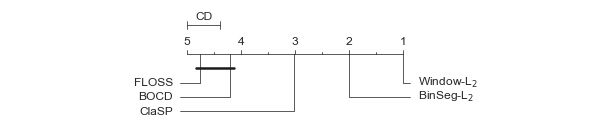

In [9]:
cd = Orange.evaluation.scoring.compute_CD(means, df_runtimes.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_runtimes.columns[1:], cd=cd, width=8, reverse=True, textspace=2.5)

In [10]:
for name, rank in zip(df_runtimes.columns[1:], means):
    print(f" {name}: rank={np.round(rank, 5)}")

 ClaSP: rank=3.03061
 FLOSS: rank=4.76531
 Window-L$_2$: rank=1.0
 BinSeg-L$_2$: rank=2.0
 BOCD: rank=4.20408


Let's compute wins/losses against ClaSP.

In [11]:
for rival in df_runtimes.columns[1:]:
    if rival == "ClaSP": continue
    
    df_pair = df_runtimes[["ClaSP", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

ClaSP vs FLOSS: (wins/losses/ties): 97/1/0
ClaSP vs Window-L$_2$: (wins/losses/ties): 0/98/0
ClaSP vs BinSeg-L$_2$: (wins/losses/ties): 0/98/0
ClaSP vs BOCD: (wins/losses/ties): 96/2/0


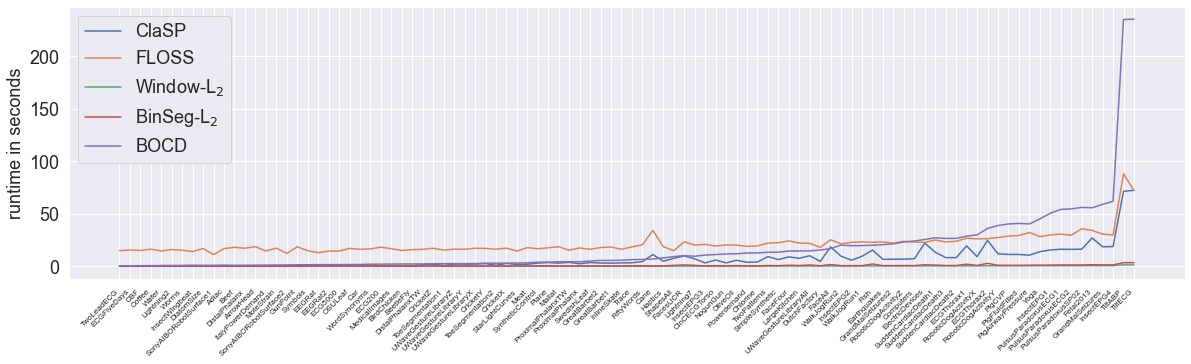

In [12]:
fontsize = 18
_, ax  = plt.subplots(1, figsize=(20,5))

for name in df_runtimes.columns[1:]:
    ax.plot(df_runtimes[name].to_numpy()[idx_sizes], label=name)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
ax.legend(loc=2, prop={'size': fontsize})
ax.set_ylabel("runtime in seconds", fontsize=fontsize)

names = df_runtimes.name.to_numpy().tolist()

for idx, name in enumerate(names):
    if name == "PigInternalBleedingDatasetAirwayPressure":
        names[idx] = "PigAirwayPressure"
        
    if name == "PigInternalBleedingDatasetArtPressureFluidFilled":
        names[idx] = "PigFluidFilled"
        
    if name == "PigInternalBleedingDatasetCVP":
        names[idx] = "PigCVP"
        
    if name == "ChlorineConcentration":
        names[idx] = "Chlorine"
        
    if name == "DiatomSizeReduction":
        names[idx] = "DiatomSize"
        
    if name == "DistalPhalanxOutlineAgeGroup":
        names[idx] = "DistalPhalanx"
        
    if name == "InsectWingbeatSound":
        names[idx] = "InsectWingbeat"
        
    if name == "LargeKitchenAppliances":
        names[idx] = "LargeKitchen"
        
    if name == "NonInvasiveFetalECGThorax1":
        names[idx] = "ECGThorax1"
        
    if name == "NonInvasiveFetalECGThorax2":
        names[idx] = "ECGThorax2"
        
    if name == "ProximalPhalanxOutlineAgeGroup":
        names[idx] = "ProximalPhalanx"
        
names = np.array(names)[idx_sizes]

plt.xticks(range(df_runtimes.shape[0]), names, rotation = 45, ha="right", fontsize=8)
plt.show()

Let's perform a scalability analysis for ClaSP.

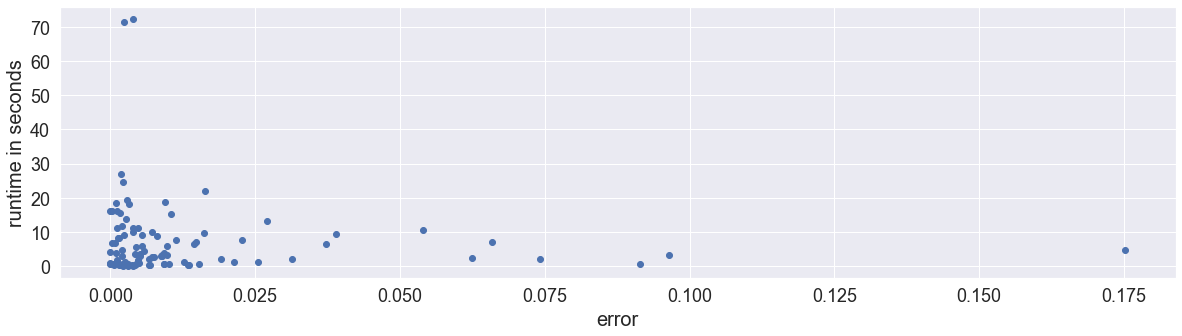

In [13]:
fontsize = 18

_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(df_scores.ClaSP, df_runtimes.ClaSP)
ax.set_xlabel("error", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.show()

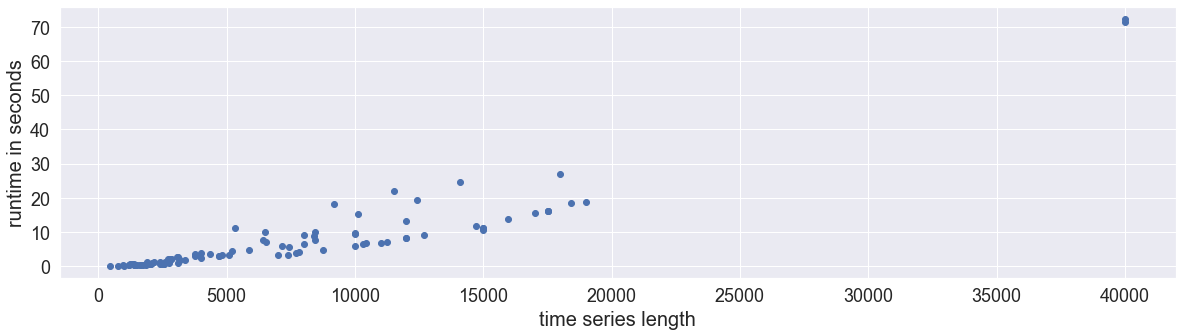

In [14]:
fontsize = 18

_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(df_comb.time_series.apply(len), df_runtimes.ClaSP)
ax.set_xlabel("time series length", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.show()

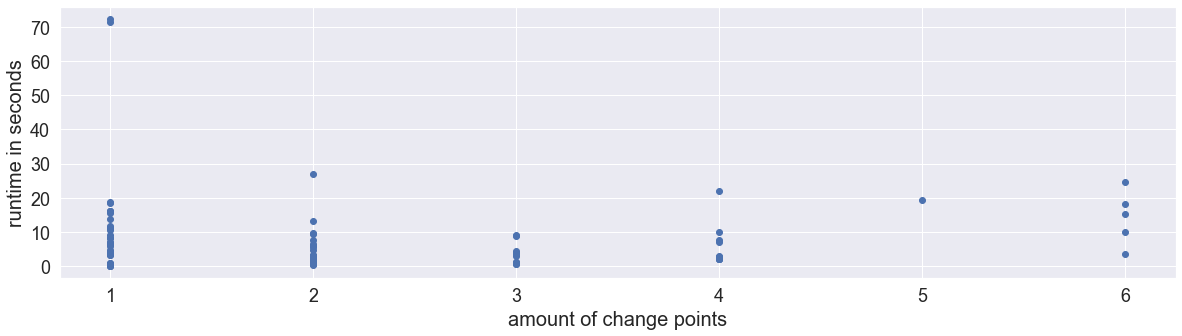

In [15]:
fontsize = 18

_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(df_comb["change points"].apply(len), df_runtimes.ClaSP)
ax.set_xlabel("amount of change points", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.show()

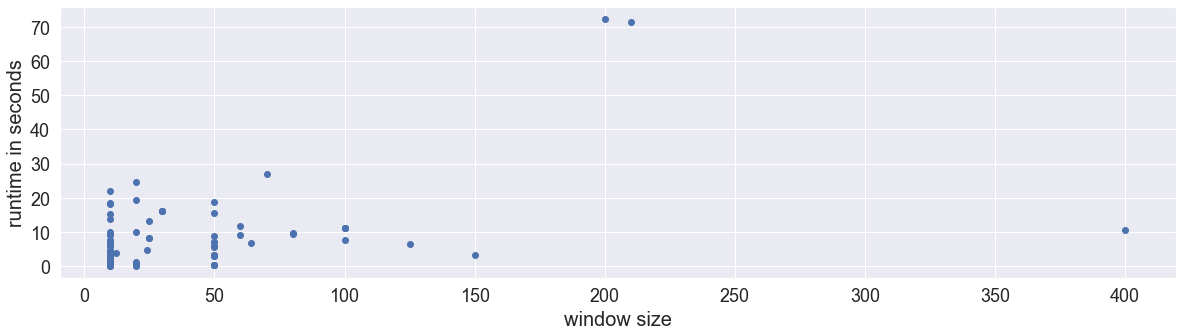

In [16]:
fontsize = 18

_, ax = plt.subplots(1, figsize=(20,5))
ax.scatter(df_comb.window_size, df_runtimes.ClaSP)
ax.set_xlabel("window size", fontsize=20)
ax.set_ylabel("runtime in seconds", fontsize=20)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.show()